In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
crime = pd.read_csv('crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
crime2 = crime.iloc[:,1:]
crime2

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [4]:
# Normalize heterogenous numerical data using z-score (x-mean/std) or custom defined function 
# Normalization function - here custom defined
def norm_func(i):
    x =(i-i.min())/(i.max()-i.min())
    return(x)

In [5]:
crime2_norm = norm_func(crime2)

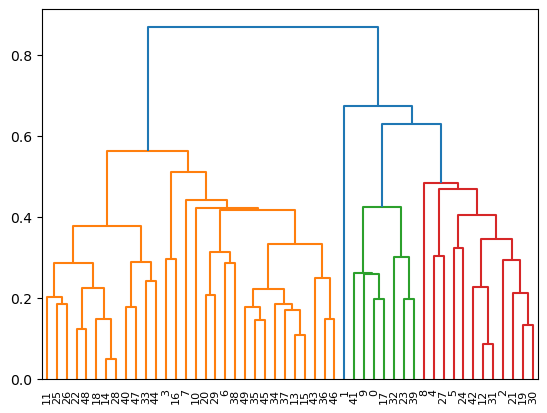

In [6]:
#dendrogram
dendrogram = sch.dendrogram(sch.linkage(crime2_norm, method ='average'))

In [7]:
#Creating clusters
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean',linkage='ward')

In [8]:
y_pred = hc.fit_predict(crime2_norm)
clusters = pd.DataFrame(y_pred, columns=['clusters'])
clusters

,clusters
0,3
1,0
2,0
3,4
4,0
5,0
6,1
7,1
8,0
9,3


In [9]:
crime['cluster_id'] = clusters
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster_id
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,4
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,3


In [10]:
crime.groupby('cluster_id').agg(['mean']).reset_index()

C:\Users\Dell\AppData\Local\Temp\ipykernel_4204\3775092925.py:1: FutureWarning: ['Unnamed: 0'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  crime.groupby('cluster_id').agg(['mean']).reset_index()


,cluster_id,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,10.815385,257.384615,76.000000,33.192308
1,1,4.644444,144.444444,79.222222,18.766667
2,2,3.091667,76.000000,52.083333,11.833333
3,3,14.671429,251.285714,54.285714,21.685714
4,4,7.466667,135.666667,63.444444,18.600000


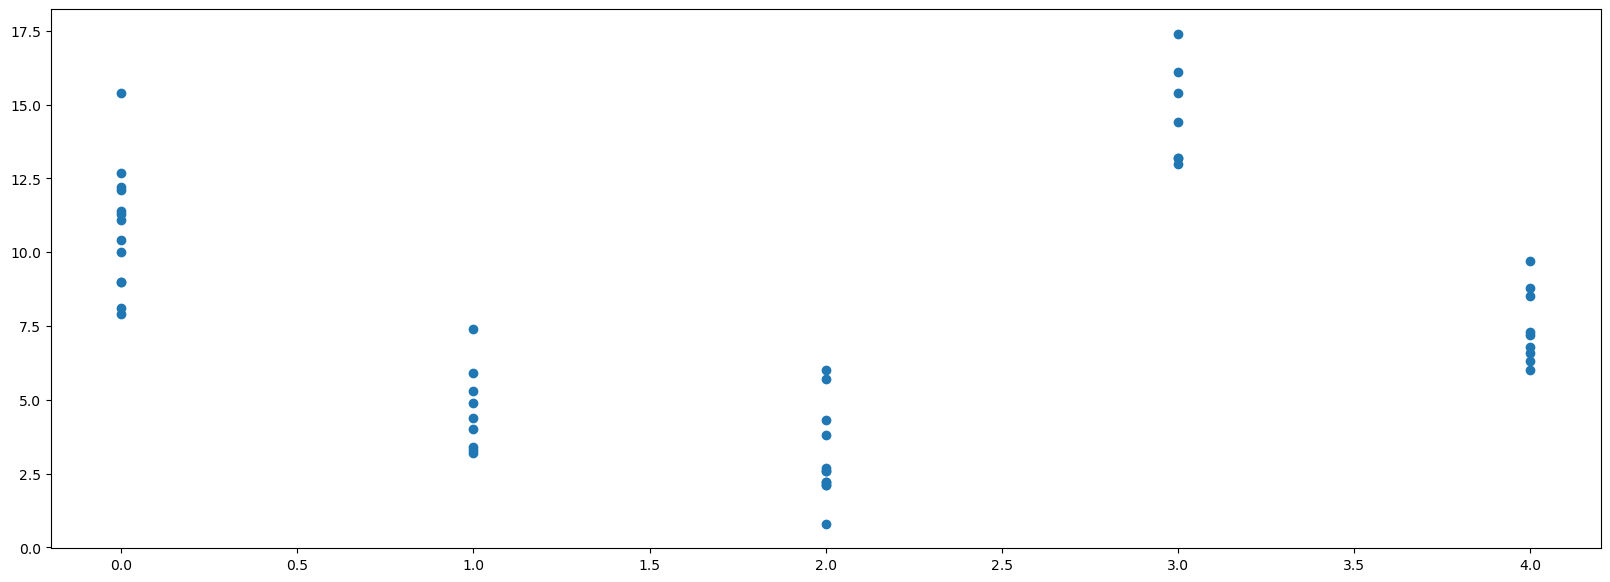

In [11]:
plt.figure(figsize=(20,7))
plt.scatter(crime.cluster_id, crime.Murder)
plt.show()